In [1]:
# 한글설치 (윈도우 버전)
import matplotlib

matplotlib.rc('font', family = 'Malgun Gothic')

In [2]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [3]:
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)

## 통계의 이해 (P 22)

In [4]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

### 기술통계량 연습 (P 23)

In [5]:
ds_mycars = pd.read_csv("C:/청년AI.BigData아카데미/data/mycars.csv", engine = "python")
ds_mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [6]:
ds_mycars.describe().round(3)

,displacement,year,cylinder,mpg,highway_mileage
count,234.000,234.00,234.000,234.000,234.000
mean,3.472,2003.50,5.889,16.859,23.440
std,1.292,4.51,1.612,4.256,5.955
min,1.600,1999.00,4.000,9.000,12.000
25%,2.400,1999.00,4.000,14.000,18.000
50%,3.300,2003.50,6.000,17.000,24.000
75%,4.600,2008.00,8.000,19.000,27.000
max,7.000,2008.00,8.000,35.000,44.000


In [7]:
# 24 Page
df = ds_mycars[['model','mpg']]
# 모델 별 데이터 수 평균 표준편차 
df.groupby('model').describe()

mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

### 기술통계량 실습 (P 25)

In [8]:
df= ds_mycars[['manufacturer', 'driving', 'mpg']]
df.groupby('manufacturer').describe()

mpg                                                    
             count       mean       std   min   25%   50%    75%   max
manufacturer                                                          
audi          18.0  17.611111  1.974511  15.0  16.0  17.5  18.75  21.0
chevrolet     19.0  15.000000  2.924988  11.0  13.5  15.0  16.50  22.0
dodge         37.0  13.135135  2.485091   9.0  11.0  13.0  15.00  18.0
ford          25.0  14.000000  1.914854  11.0  13.0  14.0  15.00  18.0
honda          9.0  24.444444  1.943651  21.0  24.0  24.0  25.00  28.0
hyundai       14.0  18.642857  1.499084  16.0  18.0  18.5  19.75  21.0
jeep           8.0  13.500000  2.507133   9.0  12.5  14.0  15.00  17.0
land rover     4.0  11.500000  0.577350  11.0  11.0  11.5  12.00  12.0
lincoln        3.0  11.333333  0.577350  11.0  11.0  11.0  11.50  12.0
mercury        4.0  13.250000  0.500000  13.0  13.0  13.0  13.25  14.0
nissan        13.0  18.076923  3.426892  12.0  15.0  19.0  19.00  23.0
pontiac        5.0  17.000000  1.000000  16.0  16.0  17.0  18.00  18.0
subaru        14.0  19.285714  0.913874  18.0  19.0  19.0  20.00  21.0
toyota        34.0  18.529412  4.046961  11.0  15.0  18.0  21.00  28.0
volkswagen    27.0  20.925926  4.556702  16.0  18.5  21.0  21.00  35.0

In [9]:
df.groupby('driving').describe()

mpg                                                   
         count       mean       std   min   25%   50%   75%   max
driving                                                          
4        103.0  14.330097  2.874459   9.0  13.0  14.0  16.0  21.0
f        106.0  19.971698  3.626510  11.0  18.0  19.0  21.0  35.0
r         25.0  14.080000  2.215852  11.0  12.0  15.0  15.0  18.0

### 범주형 변수의 기술통계량 연습 (P 26)

In [10]:
ds_Exh_QC1=pd.read_csv('C:/청년AI.BigData아카데미/data/EXH_QC1.csv', engine = 'python')
df=ds_Exh_QC1[['Flaws','Period']]
count = df['Flaws'].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count/sum(count) * 100
cumpct = np.cumsum(percent)

In [11]:
# 27 Page
count_data = pd.DataFrame({'Count': count,
                           'CumCnt': cumcnt, 
                           'Percent': percent, 
                           'CumPct': cumpct})
count_data.columns.name='Flaws'
count_data

Flaws,Count,CumCnt,Percent,CumPct
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


In [12]:
count2 = df['Period'].value_counts().sort_index()
cumcnt2 = np.cumsum(count2)
percent2 = count2/sum(count2) * 100
cumpct2 = np.cumsum(percent2)
count_data2 = pd.DataFrame({'Count': count2, 
                            'CumCnt': cumcnt2, 
                            'Percent': percent2, 
                            'CumPct': cumpct2})
count_data2.columns.name='Period'
count_data2

Period,Count,CumCnt,Percent,CumPct
Day,7,7,17.5,17.5
Evening,7,14,17.5,35.0
Night,19,33,47.5,82.5
Weekend,7,40,17.5,100.0


### 범주형 변수의 기술통계량 실습 (P 28)

In [13]:
ds_mycars = pd.read_csv('C:/청년AI.BigData아카데미/data/mycars.csv', engine = 'python')
df=ds_mycars[['model','mpg']]
count = df['model'].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count/sum(count) * 100
cumpct = np.cumsum(percent)
count_data = pd.DataFrame({'Count': count, 
                           'CumCnt': cumcnt, 
                           'Percent': percent, 
                           'CumPct': cumpct})
count_data.columns.name='Model'
count_data

Model,Count,CumCnt,Percent,CumPct
4runner 4wd,6,6,2.564103,2.564103
a4,7,13,2.991453,5.555556
a4 quattro,8,21,3.418803,8.974359
a6 quattro,3,24,1.282051,10.256410
altima,6,30,2.564103,12.820513
c1500 suburban 2wd,5,35,2.136752,14.957265
camry,7,42,2.991453,17.948718
camry solara,7,49,2.991453,20.940171
caravan 2wd,11,60,4.700855,25.641026
civic,9,69,3.846154,29.487179


### 정규분포 누적확률값 계산 연습 (P 42)

In [14]:
mu = 115
sigma = 20
x = 135
prop = stats.norm.cdf(x, mu, sigma)
print("{0}분 이상 걸리는 A/S 작업 비율: {1:.1f}%".format(x,(1-prop)*100))

135분 이상 걸리는 A/S 작업 비율: 15.9%


### 정규분포 누적확률값 계산 실습 (P 43)

In [15]:
mu = 175
sigma = 5
x = 180
prop = stats.norm.cdf(x, mu, sigma) 

print("{0}cm일 경우 상위 {1:.1f}% 에 해당함".format(x,(1-prop)*100 ))

180cm일 경우 상위 15.9% 에 해당함


### 정규분포 누적확률값 계산 실습 (P 44)

In [16]:
mu = 12
sigma = 3
x1 = 15
# prob1: 누적확률 15이하 값 계산
prob1 = stats.norm.cdf(x1, mu, sigma)
print("{0}km 이상 {1}km 이하를 달릴 확률은 {2:.1f}% 에 해당함".format(mu, x1,(prob1-0.5)*100 ))

12km 이상 15km 이하를 달릴 확률은 34.1% 에 해당함


### 정규분포 누적확률값 계산 실습 (P 45)

In [17]:
# (1) 9km이상 15km이하를 달릴 확률
mu = 12
sigma = 3
x1 = 9
x2 = 15

prop1 = stats.norm.cdf(x1, mu, sigma)
prop2 = stats.norm.cdf(x2, mu, sigma)
print("1) {0}km 이상 {1}km 이하를 달릴 확률은 {2:.1f}% 에 해당함".format(x1, x2,(prop2-prop1)*100 ))

# (2) 15km 이상 달릴 확률
print("2) {0}km 이상을 달릴 확률은 {1:.1f}% 에 해당함".format(x2,(1-prop2)*100 ))

1) 9km 이상 15km 이하를 달릴 확률은 68.3% 에 해당함
2) 15km 이상을 달릴 확률은 15.9% 에 해당함


### t 분포 누적확률값 계산 연습 (P 53)

In [18]:
t=1.53
df=5
prop=stats.t.cdf(t, df)

print("P(T<= {0})보다 작을 누적확률값 : {1:.3f}".format(t, prop))

P(T<= 1.53)보다 작을 누적확률값 : 0.907


### t 분포 누적확률값 계산 실습 (P 54)

In [19]:
t=2.0
df=10
prop=stats.t.cdf(t, df)
print("P(T<= {0})보다 작을 누적확률값 : {1:.3f}".format(t, prop))

P(T<= 2.0)보다 작을 누적확률값 : 0.963


### Chi-square분포 그리기 연습 (P 56)

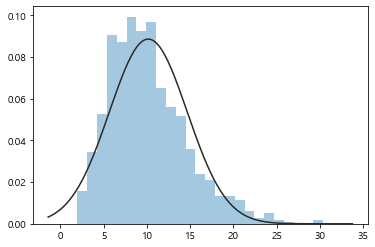

In [20]:
np.random.seed(seed = 1234)
chisq_df10 = np.random.chisquare(df = 10, size = 1000) 
sns.distplot(chisq_df10, fit = stats.norm, kde = False)

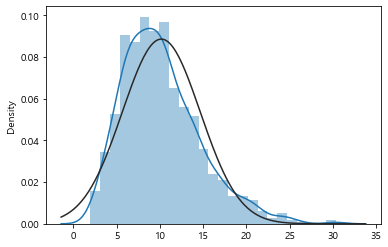

In [21]:
np.random.seed(seed = 1234)
chisq_df10 = np.random.chisquare(df = 10, size = 1000) 
sns.distplot(chisq_df10, fit=stats.norm, kde = True)

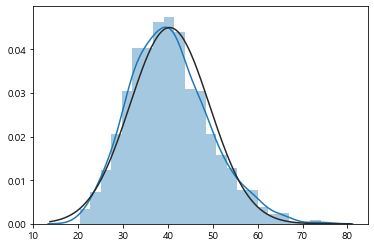

In [22]:
# 57 Page
np.random.seed(seed = 1234)
chisq_df40 = np.random.chisquare(df = 40, size = 1000) 
sns.distplot(chisq_df40, fit=stats.norm, kde = True)

### Chi-square분포 그리기 실습 (P 58)

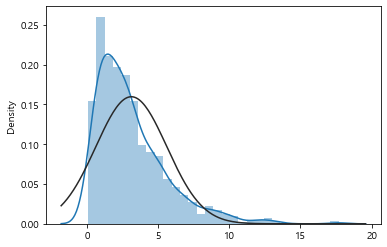

In [22]:
np.random.seed(seed = 1234)
chisq_df3 = np.random.chisquare(df = 3, size = 1000) 
sns.distplot(chisq_df3, fit = stats.norm, kde = True)

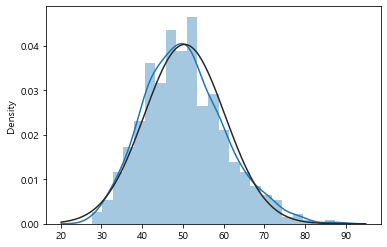

In [23]:
np.random.seed(seed = 1234)
chisq_df50 = np.random.chisquare(df = 50, size = 1000) 
sns.distplot(chisq_df50, fit = stats.norm, kde = True)

### Chi-square 누적확률값 계산 연습 (P 59)

In [24]:
chisq = 10
df = 30
prop = stats.chi2.cdf(chisq, df)

print("P(X<={0}) : {1:.4f}".format(chisq,prop))

P(X<=10) : 0.0002


### Chi-square 누적확률값 계산 실습 (P 60)

In [25]:
chisq = 3.0
df = 8
prop = stats.chi2.cdf(chisq, df)

print("P(Chi-square<={0}) : {1:.4f}".format(chisq,prop))

P(Chi-square<=3.0) : 0.0656


### F분포 누적확률값 계산 연습 (P 63)

In [26]:
f = 2
dfnum = 15
dfden = 15
prop = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)

print("P(F<={0}) : {1:.3f}".format(f, prop))

P(F<=2) : 0.904


### F분포 누적확률값 계산 실습 (P 64)

In [27]:
f = 1.5
dfnum = 10
dfden = 100
prop = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)

print("P(F<={0}) : {1:.3f}".format(f, prop))

P(F<=1.5) : 0.850


### Weibull 분포 누적확률값 계산 연습 (P 67)

In [28]:
x = 1500
alpha = 2.2
beta = 1200
prop = stats.weibull_min.cdf(x, alpha, scale=beta)

print("P(X>={0}): {1:.5f}".format(x,(1 - prop)))

P(X>=1500): 0.19518


### Weibull 분포 누적확률값 계산 실습 (P 68)

In [29]:
x = 2500
alpha = 5.2
beta = 2200
prop = stats.weibull_min.cdf(x, alpha, scale = beta)

print("P(X>={0}): {1:.5f}".format(x, (1 - prop)))

P(X>=2500): 0.14313


### 이항분포 확률 계산 연습 (P 74)

In [30]:
n = 3
for i in range(n+1):
    prop = stats.binom.pmf(k = i, n = n, p = 0.4)
    print("P(X={0}) = {1:.3f}".format(i,prop))

P(X=0) = 0.216
P(X=1) = 0.432
P(X=2) = 0.288
P(X=3) = 0.064


### 이항분포 확률 계산 실습 (P 75)

In [31]:
n = 5
for i in range(n+1):
    prop = stats.binom.pmf(k = i, n = n, p = 0.3)
    print("P(X={0}) = {1:.3f}".format(i,prop))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


### 포아송분포 확률 계산 연습 (P 77)

In [32]:
mu = 2
prop = stats.poisson.pmf(3, mu)
cdf_prop = stats.poisson.cdf(2, mu)

print("1분당 {0}번의 전화가 걸려올 확률: {1:.4f}".format(3, prop))
print("1분당 최대 {0}회 이하의 전화가 걸려올 확률: {1:.4f}".format(2, cdf_prop))

1분당 3번의 전화가 걸려올 확률: 0.1804
1분당 최대 2회 이하의 전화가 걸려올 확률: 0.6767


In [33]:
# 개인코딩
mu = 2
prop0 = stats.poisson.pmf(0, mu)
prop1 = stats.poisson.pmf(1, mu)
prop2 = stats.poisson.pmf(2, mu)
cdf_prop = prop0 + prop1 + prop2

print("1분당 최대 {0}회 이하의 전화가 걸려올 확률: {1:.4f}".format(2, cdf_prop))

1분당 최대 2회 이하의 전화가 걸려올 확률: 0.6767


### 포아송분포 확률 계산 실습 (P 78)

In [34]:
mu = 2
prop = stats.poisson.pmf(2, mu)
cdf_prop1 = stats.poisson.cdf(1, mu)
cdf_prop2 = 1- stats.poisson.cdf(2, mu)

print("1시간에 {0}명의 손님이 올 확률: {1:.2f}%".format(2, prop * 100 ))
print("1시간에 {0}명 이하의 손님이 올 확률: {1:.2f}%".format(1, cdf_prop1 * 100))
print("1시간에 {0}명 이상의 손님이 올 확률: {1:.2f}%".format(3, (1-cdf_prop2) * 100))

1시간에 2명의 손님이 올 확률: 27.07%
1시간에 1명 이하의 손님이 올 확률: 40.60%
1시간에 3명 이상의 손님이 올 확률: 67.67%


### 정규성 검정 연습 (P 95)

In [35]:
from scipy.stats import shapiro
# camshaft 데이터 가져오기
ds_camshaft = pd.read_csv('C:/청년AI.BigData아카데미/data/camshaft.csv', engine = 'python')
ds_camshaft.head()

,Length,Supp1,Supp2
0,601.4,598.0,601.6
1,601.6,599.8,600.4
2,598.0,600.0,598.4
3,601.4,599.8,600.0
4,599.4,600.0,596.8


In [36]:
data1 = ds_camshaft['Supp1']
# 정규성 검정
shapiro(data1)

ShapiroResult(statistic=0.9788156747817993, pvalue=0.10744144767522812)

### 정규성 검정 실습 (P 96)

In [37]:
ds = pd.read_csv('C:/청년AI.BigData아카데미/data/2sample_t_test.csv', engine='python')
ds.head()

,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1


In [38]:
ds = ds.dropna(axis=0)

In [39]:
data1 = ds['Mat_A']
data2 = ds['Mat_B']
# 정규성 검정
shapiro(data1)

ShapiroResult(statistic=0.9062638878822327, pvalue=0.25630074739456177)

In [40]:
shapiro(data2)

ShapiroResult(statistic=0.9729756116867065, pvalue=0.9169799089431763)

### 모평균(Z) 구간추정 연습 (P 98)

In [41]:
# 수작업 계산시 Z값
prop = stats.norm.ppf(0.025, 0, 1)
prop

-1.9599639845400545

In [42]:
df = pd.DataFrame({'sample': [3.6,2.9,2.8,2.6,3.4,3.2,2.2,2.6,2.6,2.4,2.4,2.6,3.4,2.4,2.1,2.6,3.0,2.4,2.7,2.4,
                              2.6,2.9,2.9,2.0,2.7,2.2,2.8,2.7,1.8,2.5,3.0,3.2,2.8,2.6,3.2,3.1,2.9,2.7,2.7,2.2]})
df.head()

,sample
0,3.6
1,2.9
2,2.8
3,2.6
4,3.4


In [43]:
# 정규분포 구간 추정 함수 실행 
lower,upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 0.397/np.sqrt(40))
print("신뢰구간: ({0}, {1})" .format(lower.round(2), upper.round(2)))

신뢰구간: ([2.57], [2.82])


In [44]:
# 개인코딩
lower,upper = stats.norm.interval(0.95, loc = np.mean(df), scale = stats.sem(df))
print("신뢰구간: ({0}, {1})" .format(lower.round(2), upper.round(2)))

신뢰구간: ([2.57], [2.82])


### 모평균(Z) 구간추정 실습 (P 99)

In [45]:
df = pd.DataFrame({'sample': [18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]})

lower,upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 3.8/np.sqrt(20))

print("신뢰구간: ({0}, {1})" .format(lower.round(2), upper.round(2)))

신뢰구간: ([17.83], [21.17])


In [46]:
# 개인코딩
df = pd.DataFrame({'sample': [18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]})

lower,upper = stats.norm.interval(0.95, loc = np.mean(df), scale = stats.sem(df))

print("신뢰구간: ({0}, {1})" .format(lower.round(2), upper.round(2)))

신뢰구간: ([18.8], [20.2])


### 모평균(t) 구간추정 연습 (P 101)

In [47]:
df = pd.DataFrame({'sample': [54.1,53.3,56.1,55.7,54.0,54.1,54.5,57.1,55.2,
                              53.8,54.1,54.1,56.1,55.0,55.9,56.0,54.9,54.3,
                              53.9,55.0]})
lower,upper = stats.t.interval(0.95, len(df)-1,loc=np.mean(df),scale=stats.sem(df))

print("신뢰구간: ({0}, {1})" .format(lower.round(2), upper.round(2)))

신뢰구간: ([54.39], [55.33])


### 모평균(t) 구간추정 실습 (P 102)

In [48]:
df = pd.DataFrame({'sample': [73,71,74,69,70,73,70,68,75,72,70,72,73,70,70,
                              72,71,70,75,72]})
lower,upper = stats.t.interval(0.95, len(df)-1,loc=np.mean(df),scale=stats.sem(df))

print("신뢰구간: ({0}, {1})" .format(lower.round(2), upper.round(2)))

신뢰구간: ([70.6], [72.4])


### 모분산 신뢰구간 추정 수작업 계산 (P 104)

In [49]:
prop = stats.chi2.ppf(0.05, 9)
prop

3.325112843066815

### 모분산 신뢰구간 추정 (P 106)

In [50]:
prop = stats.chi2.ppf(0.025, 49)
prop

31.554916462667126

In [51]:
prop = stats.chi2.ppf(0.975, 49)
prop

70.22241356643451

In [52]:
ds = pd.DataFrame({'sample': [12,13,16,9,5,19,13,8,11,17,9,5,12,11,8,6,10,12,17,11,10,9,12,14,9,6,8,14,5,8,
                              5,8,4,9,6,8,13,16,9,5,16,13,14,17,11,9,19,16,12,8]})

alpha = 0.05
n = len(ds)
s = np.var(ds['sample'])
df = n-1

upper = (n - 1) * s / stats.chi2.ppf(alpha/2, df)
lower = (n - 1) * s / stats.chi2.ppf(1 - alpha/2, df)

print("신뢰구간: ({0}, {1})" .format(lower.round(2), upper.round(2)))

신뢰구간: (10.85, 24.15)


### 모비율 신뢰구간 추정 (P 108)

In [53]:
prop = stats.norm.ppf(0.05, 0, 1)
prop

-1.6448536269514729

In [54]:
prop = stats.norm.ppf(0.95, 0, 1)
prop

1.6448536269514722

### 모비율 신뢰구간 추정 (P 110)

In [55]:
prop = stats.norm.ppf(0.025, 0, 1)
prop

-1.9599639845400545

### t분포 신뢰구간 수작업 계산 (P 128)

In [56]:
prop = stats.t.ppf(0.025, 9)
prop

-2.262157162740992

### 1 Sample t-Test 연습 (P 130)

In [57]:
df=pd.DataFrame({'sample': [74.5, 81.2, 73.8, 82.0, 76.3, 75.7, 80.2, 72.6,
                            77.9, 82.8]})
shapiro(df)

ShapiroResult(statistic=0.9331596493721008, pvalue=0.47968029975891113)

In [58]:
t_result = stats.ttest_1samp(df, 76.7)
t, p = t_result.statistic.round(3), t_result.pvalue.round(7)

print( "1-Sample t-test ")
print( "t통계량: {}".format(t))
print( "p-value: {}".format(p))

1-Sample t-test 
t통계량: [0.864]
p-value: [0.4098303]


### 1 Sample t-Test 실습 (P 131)

In [59]:
df=pd.DataFrame({'sample': [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4,
                            78.1, 79.2]})
shapiro(df)

ShapiroResult(statistic=0.8473217487335205, pvalue=0.0539751797914505)

In [60]:
t_result = stats.ttest_1samp(df, 76.7)
t, p = t_result.statistic.round(3), t_result.pvalue.round(7)

print( "1-Sample t-test ")
print( "t검정통계량: {}".format(t))
print( "p-value: {}".format(p))

1-Sample t-test 
t검정통계량: [4.879]
p-value: [0.0008731]


### 2 Sample t-Test 연습 (P 137)

In [61]:
df1 = pd.DataFrame({'sample': [6, 5, 5, 4, 6, 7, 6, 4, 5, 6, 4, 5, 5, 6, 4, 8, 6, 5, 6, 7]})
df2 = pd.DataFrame({'sample': [7, 5, 7, 8, 7, 8, 8, 5, 7, 6, 5, 5, 6, 6, 5, 7, 9, 7, 7, 8]})
# 정규성 검정
shapiro(df1)

ShapiroResult(statistic=0.9094840288162231, pvalue=0.06230909377336502)

In [62]:
shapiro(df2)

ShapiroResult(statistic=0.8978105783462524, pvalue=0.03752673789858818)

In [63]:
# 등분산성 검정
stats.levene(df1['sample'],df2['sample'])

LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)

In [64]:
stats.bartlett(df1['sample'], df2['sample'])

BartlettResult(statistic=0.2158392670118528, pvalue=0.6422286416307027)

In [65]:
t_result = stats.ttest_ind(df1, df2, equal_var = True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print( "2-Sample t-test ")
print( "t검정통계량: {} " .format(t))
print( "p-value: {} " .format(p))

2-Sample t-test 
t검정통계량: [-3.122] 
p-value: [0.003] 


In [66]:
# 개인코딩
t_result = stats.ttest_ind(df1, df2, equal_var = False)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print( "2-Sample t-test ")
print( "t검정통계량: {} " .format(t))
print( "p-value: {} " .format(p))

2-Sample t-test 
t검정통계량: [-3.122] 
p-value: [0.003] 


In [67]:
# 개인 코딩내용
df1 = pd.DataFrame({'sample': [6, 5, 5, 4, 6, 7, 6, 4, 5, 6, 4, 5, 5, 6, 4, 8, 6, 5, 6, 7]})
df2 = pd.DataFrame({'sample': [7, 5, 7, 8, 7, 8, 8, 5, 7, 6, 5, 5, 6, 6, 5, 7, 9, 7, 7, 8]})
x=stats.shapiro(df1['sample'])
y=stats.shapiro(df2['sample'])
z=np.var(df1['sample'])/np.var(df2['sample'])
dof1=len(df1) - 1
dof2=len(df2) - 1
p_value = stats.f.cdf(z, dof1, dof2)

print('The Shapiro-Wilkis Statistic is %.3f and the p-value is %.3f' %x)
print('The Shapiro-Wilkis Statistic is %.3f and the p-value is %.3f' %y)
print('The F-test p-value is %.3f' %(1-p_value))

The Shapiro-Wilkis Statistic is 0.909 and the p-value is 0.062
The Shapiro-Wilkis Statistic is 0.898 and the p-value is 0.038
The F-test p-value is 0.679


### 2 Sample t-Test 실습 (P 139)

In [68]:
df1 = pd.DataFrame({'A': [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344]})
df2 = pd.DataFrame({'B': [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})
# 정규성 검정
shapiro(df1)

ShapiroResult(statistic=0.8425756096839905, pvalue=0.08004552870988846)

In [69]:
shapiro(df2)

ShapiroResult(statistic=0.7734811902046204, pvalue=0.014793740585446358)

In [70]:
# 등분산성 검정
stats.levene(df1['A'],df2['B'])

LeveneResult(statistic=0.4408416728536036, pvalue=0.5175025061092301)

In [71]:
t_result = stats.ttest_ind(df1, df2, equal_var = True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print( "2-Sample t-test ")
print( "t검정통계량 : {} " .format(t))
print( "p-value : {} " .format(p))

2-Sample t-test 
t검정통계량 : [1.7] 
p-value : [0.111] 


In [72]:
# 개인 코딩내용
df1 = pd.DataFrame({'A': [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344]})
df2 = pd.DataFrame({'B': [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})
x=stats.shapiro(df1['A'])
y=stats.shapiro(df2['B'])
z=np.var(df1['A'])/np.var(df2['B'])
dof1=len(df1) - 1
dof2=len(df2) - 1
p_value = stats.f.cdf(z, dof1, dof2)

print('The Shapiro-Wilkis Statistic is %.3f and the p-value is %.3f' %x)
print('The Shapiro-Wilkis Statistic is %.3f and the p-value is %.3f' %y)
print('The F-test p-value is %.3f' %(1-p_value))

The Shapiro-Wilkis Statistic is 0.843 and the p-value is 0.080
The Shapiro-Wilkis Statistic is 0.773 and the p-value is 0.015
The F-test p-value is 0.258


In [73]:
t_result = stats.ttest_ind(df1, df2, equal_var = True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print( "2-Sample t-test ")
print( " t: {} " .format(t))
print( " p: {} " .format(p))

2-Sample t-test 
 t: [1.7] 
 p: [0.111] 


### paired t-Test 연습 (P 140)

In [74]:
df1 = pd.DataFrame({'before': [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'after': [810, 670, 790, 712, 810, 670, 790, 712, 790, 712]})

t_result = stats.ttest_rel(df1, df2)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print( "Paired t-test ")
print( "t검정통계량 : {} " .format(t))
print( "p-value : {} " .format(p))

Paired t-test 
t검정통계량 : [-5.324] 
p-value : [0.] 


### paired t-Test 실습 (P 142)

In [75]:
df1 = pd.DataFrame({'before': [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'after': [710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

t_result = stats.ttest_rel(df1, df2)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print( "Paired t-test ")
print( "t검정통계량 : {} " .format(t))
print( "p-value : {} " .format(p))

Paired t-test 
t검정통계량 : [-2.266] 
p-value : [0.05] 


### 1 proportion Test 연습 (P 146)

In [76]:
from statsmodels.stats.proportion import proportions_ztest

count = 15
nobs = 100
value = .1
stat, pval = proportions_ztest(count, nobs, value)

print( "1 Proportion test ")
print( 'z검정통계량 : {0:0.3f}' .format(stat))
print( 'p-value : {0:0.3f}'.format(pval))

1 Proportion test 
z검정통계량 : 1.400
p-value : 0.161


### 1 proportion Test 실습 (P 148)

In [77]:
count = 60
nobs = 100
value = .5
stat, pval = proportions_ztest(count, nobs, value)

print( "1 Proportion test ")
print( 'z검정통계량 : {0:0.3f}' .format(stat))
print( 'p-value : {0:0.3f}'.format(pval))

1 Proportion test 
z검정통계량 : 2.041
p-value : 0.041


### 2 proportion Test 연습 (P 149)

In [78]:
ount = np.array([4, 1])
nobs = np.array([1000, 1200])
stat,pval = proportions_ztest(count, nobs)

print( "2 Proportion test ")
print( 'z검정통계량 : {0:0.3f}'.format(stat))
print( 'p-value : {0:0.3f}'.format(pval))

2 Proportion test 
z검정통계량 : 1.434
p-value : 0.152


### 2 proportion Test 실습 (P 151)

In [79]:
count = np.array([14, 5])
nobs = np.array([1200, 1200])
stat,pval = proportions_ztest(count, nobs)

print( "2 Proportion test ")
print( 'z검정통계량 : {0:0.3f}'.format(stat))
print( 'p-value : {0:0.3f}'.format(pval))

2 Proportion test 
z검정통계량 : 2.073
p-value : 0.038


### Chi-square Test 연습 (P 157)

In [80]:
df = pd.DataFrame({'HSG': [270, 260, 236, 234], 'SS400': [228, 285, 225, 262],
                   'SPA-H': [277, 284, 231, 208]})
chi, pval, dof, expected = stats.chi2_contingency(df.T)

print( "chi-square test ")
print( 'chisq검정통계량 : {0:0.3f}' .format(chi))
print( 'p-value : {0:0.3f}'.format(pval))
print( 'degree pf freedom : {}' .format(dof))
print( 'expected value: \n{}' .format(expected.round(3)))

chi-square test 
chisq검정통계량 : 13.366
p-value : 0.038
degree pf freedom : 6
expected value: 
[[258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]]


### Chi-square Test 실습 (P 159)

In [81]:
df = pd.DataFrame({'A': [18,  1, 8, 7, 10, 9, 10], 'B': [8, 2, 14, 5, 5, 9, 4],
                   'C': [4, 1, 3, 4, 9, 5, 4],'D': [4, 1, 2, 3, 2, 7, 3],
                   'E': [3, 1, 3, 1, 1, 1, 1], 'F': [3, 25, 8, 10, 2, 1, 7]})
chi, pval, dof, expected = stats.chi2_contingency(df)

print( "chi-square test ")
print( 'chisq검정통계량 : {0:0.3f}' .format(chi))
print( 'p-value : {0:0.3f}'.format(pval))
print( 'degree pf freedom : {}' .format(dof))
print( 'expected value : \n{}' .format(expected.round(3)))

chi-square test 
chisq검정통계량 : 98.274
p-value : 0.000
degree pf freedom : 30
expected value : 
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


### ANOVA Analysis 연습 (P 165)

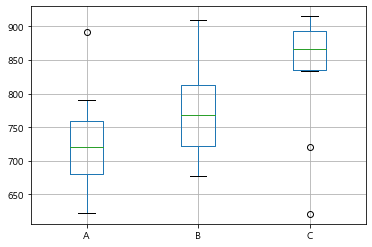

In [82]:
df = pd.DataFrame({'A': [892, 623, 721, 678, 723, 790, 720, 670, 690, 771],'B': [721, 821, 910, 678, 723, 790, 711, 790, 745, 891],
                   'C': [621, 915, 888, 721, 894, 834, 841, 912, 845, 889]})

df.boxplot(['A','B','C'])

In [83]:
f_result = stats.f_oneway(df['A'],df['B'], df['C'])
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print( "One-way ")
print( "F검정통계량 : {} " .format(f))
print( "p-value : {} " .format(p))

One-way 
F검정통계량 : 4.263 
p-value : 0.025 


In [84]:
# 개인코딩
df1 = pd.DataFrame({'A': [892, 623, 721, 678, 723, 790, 720, 670, 690, 771]})
df2 = pd.DataFrame({'B': [721, 821, 910, 678, 723, 790, 711, 790, 745, 891]})
df3 = pd.DataFrame({'C': [621, 915, 888, 721, 894, 834, 841, 912, 845, 889]})
f_result = stats.f_oneway(df1,df2,df3)
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print( "One-way ")
print( "F검정통계량 : {} " .format(f))
print( "p-value : {} " .format(p))

One-way 
F검정통계량 : [4.263] 
p-value : [0.025] 


### ANOVA Analysis 실습 (P 167)

In [85]:
df = pd.read_csv('C:/청년AI.BigData아카데미/data/ANOVA.csv', engine='python')
df.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


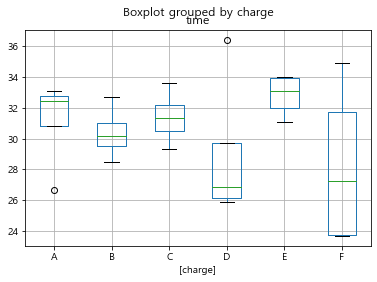

In [86]:
df.boxplot(by='charge')

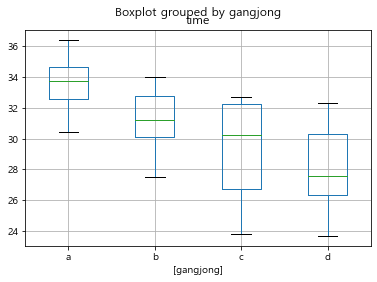

In [87]:
df.boxplot(by='gangjong')

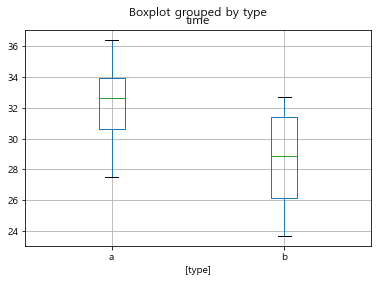

In [88]:
df.boxplot(by='type')

In [89]:
group1 = df.loc[df.gangjong=='a']
group2 = df.loc[df.gangjong=='b']

In [90]:
f_result = stats.f_oneway(group1['time'],group2['time'])
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print( "One-way ")
print( "F검정통계량 : {} " .format(f))
print( "p-value : {} " .format(p))

One-way 
F검정통계량 : 3.566 
p-value : 0.088 


### 상관분석 연습 (P 172)

In [91]:
df1 = [1, 2, 3, 4, 4, 5, 6, 6, 7, 8]
df2 = [23, 29, 49, 64, 74, 87, 96, 97, 109, 119]
corr, pval = stats.pearsonr(df1, df2)

print( "Correlation Analysis ")
print( 'correlation Coefficient : {0:0.3f}'.format(corr))
print( 'p-value : {0:0.3f}'.format(pval))

Correlation Analysis 
correlation Coefficient : 0.989
p-value : 0.000


### 상관분석 실습 (P 174)

In [92]:
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 
       36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
df2 = [14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 14, 16, 18, 13, 15,
       17, 14, 16, 20, 21]
corr, pval = stats.pearsonr(df1, df2)

print( "Correlation Analysis ")
print( 'correlation coefficient: {0:0.3f}'.format(corr))
print( 'p-value: {0:0.3f}'.format(pval))

Correlation Analysis 
correlation coefficient: -0.723
p-value: 0.000


### 회귀분석 연습 (P 198)

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
%matplotlib inline

In [94]:
# 199 Page
df_raw = pd.read_csv("C:/청년AI.BigData아카데미/data/부품수리시간.CSV", engine = "python")
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [95]:
# 요약통계량
df_raw.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


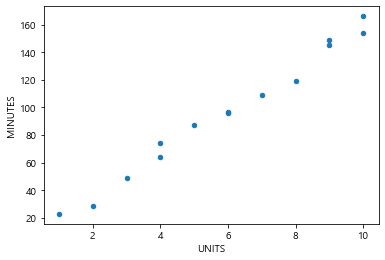

In [96]:
# 200 Page
df_raw.plot.scatter(x = "UNITS", y = "MINUTES")

In [97]:
# 목표변수와 설명변수의 상관계수
df_raw.corr(method = "pearson").round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [98]:
# 201 Page
reg_model = smf.ols(formula = "MINUTES ~ UNITS", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           8.92e-13
Time:                        17:37:21   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

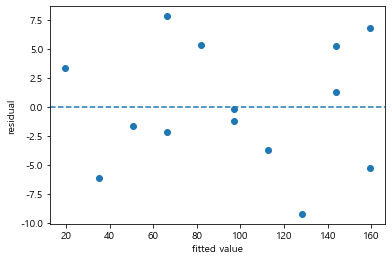

In [99]:
# 202 Page
# 잔차의 등분산성: X-예측값, Y-잔차 
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

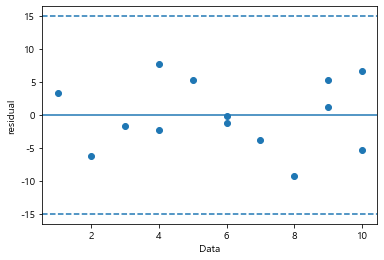

In [101]:
# 잔차의 독립성
plt.scatter(df_raw["UNITS"], reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "-")
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = "--")
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = "--")

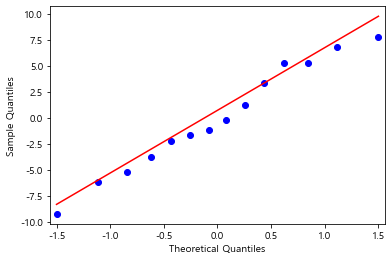

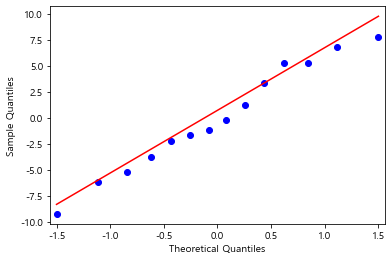

In [102]:
# 잔차 정규성 검정:Q-Q plot. s-standardized line, 
#  r-regression line, q-quartiles
qqplot(reg_result.resid, line = "q")

In [103]:
# 정규성 검정
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)

NormaltestResult(statistic=0.746448218273468, pvalue=0.6885109139659057)

In [110]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(result.resid)

0.7653165177879288

### 회귀분석 실습 (P 204)

In [104]:
Strength = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1,
            36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
Bakingtime = [0.798922, 0.84902, 0.816163, 0.758266, 0.815894, 0.807477,
              0.809068, 0.7664, 0.742243, 0.751118, 0.740629, 0.751495,
              0.738863, 0.827428, 0.818172, 0.740939, 0.757128, 0.804695,
              0.695121, 0.735377]
Bakingtime = sm.add_constant(Bakingtime)
model = sm.OLS(Strength, Bakingtime)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           1.95e-05
Time:                        17:42:42   Log-Likelihood:                -26.431
No. Observations:                  20   AIC:                             56.86
Df Residuals:                      18   BIC:                             58.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0013      4.184      3.108      0.0

(array([1., 0., 1., 1., 3., 2., 3., 3., 2., 4.]),
 array([-2.20405841, -1.85381825, -1.50357808, -1.15333791, -0.80309775,
        -0.45285758, -0.10261741,  0.24762276,  0.59786292,  0.94810309,
         1.29834326]),
 <a list of 10 Patch objects>)

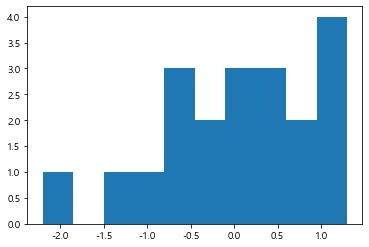

In [105]:
# 정규성검정
plt.hist(result.resid)

In [106]:
shapiro(result.resid)

ShapiroResult(statistic=0.9530239105224609, pvalue=0.4153335988521576)

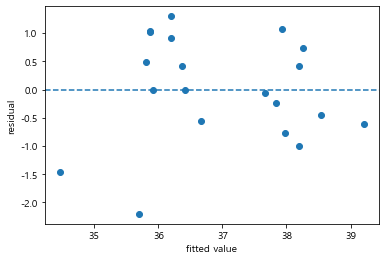

In [107]:
# 잔차 산점도: X-예측값, Y-잔차 
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

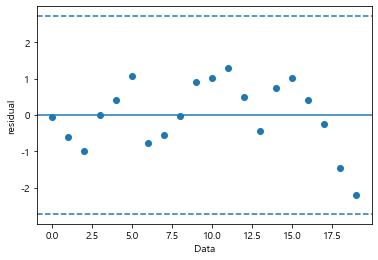

In [108]:
# 잔차의 독립성 확인
plt.scatter(range(0,20), result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "-")
plt.axhline(y = 3*np.std(result.resid), linestyle = "--")
plt.axhline(y = -3*np.std(result.resid), linestyle = "--")

In [111]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(result.resid)

0.7653165177879288